Blah blah blah


Emphasis, aka italics, with *asterisks* or _underscores_.

Strong emphasis, aka bold, with **asterisks** or __underscores__.

Combined emphasis with **asterisks and _underscores_**.

Strikethrough uses two tildes. ~~Scratch this.~~

[I'm an inline-style link](https://www.google.com)

[I'm an inline-style link with title](https://www.google.com "Google's Homepage")

[I'm a reference-style link][Arbitrary case-insensitive reference text]

[I'm a relative reference to a repository file](../blob/master/LICENSE)

[You can use numbers for reference-style link definitions][1]

Or leave it empty and use the [link text itself].

URLs and URLs in angle brackets will automatically get turned into links. 
http://www.example.com or <http://www.example.com> and sometimes 
example.com (but not on Github, for example).

Some text to show that the reference links can follow later.

[arbitrary case-insensitive reference text]: https://www.mozilla.org
[1]: http://slashdot.org
[link text itself]: http://www.reddit.com
Here's our logo (hover to see the title text):

Inline-style: 
![alt text](https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 1")

Reference-style: 
![alt text][logo]

[logo]: https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 2"

Inline `code` has `back-ticks around` it.

```javascript
var s = "JavaScript syntax highlighting";
alert(s);
```
 
```python
s = "Python syntax highlighting"
print s
```
 
```
No language indicated, so no syntax highlighting. 
But let's throw in a <b>tag</b>.
```


Colons can be used to align columns.

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | $1600 |
| col 2 is      | centered      |   $12 |
| zebra stripes | are neat      |    $1 |

There must be at least 3 dashes separating each header cell.
The outer pipes (|) are optional, and you don't need to make the 
raw Markdown line up prettily. You can also use inline Markdown.

Markdown | Less | Pretty
--- | --- | ---
*Still* | `renders` | **nicely**
1 | 2 | 3

> Blockquotes are very handy in email to emulate reply text.
> This line is part of the same quote.

Quote break.

> This is a very long line that will still be quoted properly when it wraps. Oh boy let's keep writing to make sure this is long enough to actually wrap for everyone. Oh, you can *put* **Markdown** into a blockquote. 


<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
from __future__ import division, print_function
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 10
figsize = (fig_width, fig_width/phi)
from IPython.display import display, HTML
def show_video(filename): 
    return HTML(data='<video src="{}" loop autoplay width="600" height="600"></video>'.format(filename))


%load_ext autoreload
%autoreload 2

In [2]:
N = 100
m_x, m_y = 5., 3
sigma_x, sigma_y = 1., .2
x, y = m_x + sigma_x*np.random.randn(N), m_y + sigma_y*np.random.randn(N)

In [3]:
x.min(), x.max()

(2.4701881100364207, 7.1871735405447685)

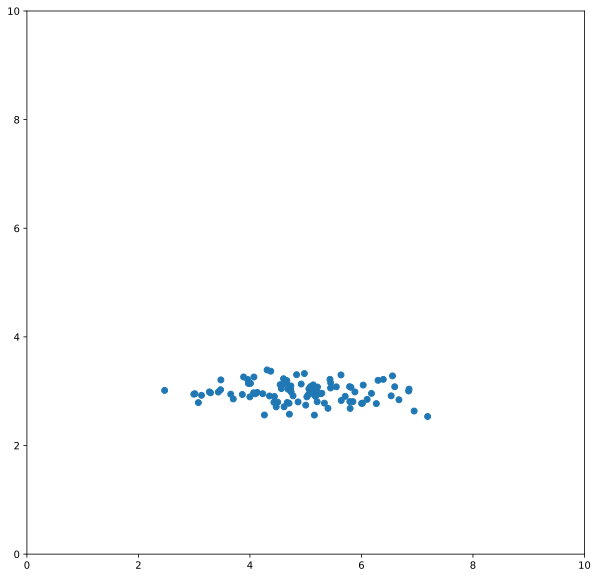

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width))
ax.scatter(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10);

Let's do the same visualization but now transformed into polar coordinates:

In [5]:
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

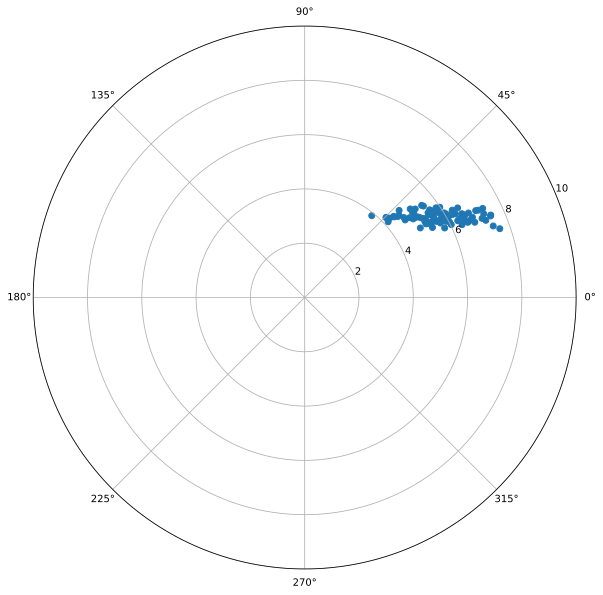

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width), subplot_kw=dict(polar=True))
ax.scatter(theta % np.pi, r);
ax.set_ylim(0, 10);


[using a change of variables](https://en.wikipedia.org/wiki/Probability_density_function#Dependent_variables_and_change_of_variables)




## projection on the ring: the von Mises distribution

## some book keeping for the notebook

In [7]:
%load_ext watermark
%watermark

2019-06-12T16:33:41+02:00

CPython 3.7.3
IPython 7.5.0

compiler   : Clang 10.0.1 (clang-1001.0.46.3)
system     : Darwin
release    : 18.6.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit


In [8]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy, pillow, imageio

Software versions
Python 3.7.3 64bit [Clang 10.0.1 (clang-1001.0.46.3)]
IPython 7.5.0
OS Darwin 18.6.0 x86_64 i386 64bit
numpy 1.16.4
scipy 1.3.0
matplotlib 3.1.0
sympy 1.4
pillow 6.0.0
imageio 2.5.0
Wed Jun 12 16:33:42 2019 CEST

In [ ]:
%%bash
cd ..
nikola build ; nikola deploy
cd posts